In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import os
# %matplotlib notebook
import glob
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

In [6]:
df = pd.read_csv('.\dataset.csv') 
df.head()

,id,label,men,women,age,CMC,traveling,CSP,HSI,Diabetes,...,Ph,HCO3,Pco2,PO2,O2satVBG,urea,Cr,Na,K,CRP
0,21909,1,1,0,52.0,0,0,0,0,1,...,7.440,25.90,38.30,19.50,33.00,42.0,1.20,137.0,4.50,69.66
1,43093,1,1,0,61.0,0,0,1,1,1,...,7.424,28.64,43.78,30.98,52.86,35.6,1.34,136.4,4.38,69.66
2,54876,1,0,1,58.0,0,0,0,1,1,...,7.500,35.30,46.00,48.00,85.20,24.3,1.70,135.0,4.80,20.10
3,377481,1,1,0,50.0,0,0,1,0,0,...,7.450,30.30,44.00,25.60,49.00,13.7,0.90,139.0,3.70,69.66
4,564311,1,1,0,67.0,0,0,1,0,1,...,7.430,31.50,48.70,25.50,33.50,39.0,0.90,135.0,4.00,69.66


In [7]:
y = df['label']
X = df.loc[:,'men':'CRP']

x_negative = df[df['label'] == 0].drop(['label'], axis=1)

y_positive = df[df['label']==1]
y_negative = df[df['label']==0]

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

[0.01320213 0.01326153 0.03158593 0.01272127 0.00699614 0.01764429
 0.00941553 0.00919697 0.01914501 0.01116037 0.00411095 0.00559214
 0.00417108 0.00979432 0.00303453 0.00739463 0.00399897 0.003368
 0.01434612 0.00419636 0.01434608 0.01084907 0.01113016 0.01142388
 0.01413833 0.02640661 0.01884487 0.01250365 0.00234716 0.00431865
 0.01613327 0.00747043 0.01181755 0.02450208 0.01105626 0.01897533
 0.01224973 0.00756519 0.00443977 0.00807228 0.00563519 0.00942202
 0.00538279 0.00984056 0.00359928 0.00419271 0.0045421  0.00608261
 0.00403768 0.00268268 0.00486657 0.05694546 0.02046157 0.02118047
 0.01745417 0.03743495 0.03797894 0.0394025  0.03203252 0.02719835
 0.02533354 0.02654371 0.03293686 0.02275306 0.03315746 0.0331514
 0.02282417]


In [9]:
feat_importances.nlargest(10)
l =feat_importances.nlargest(10).keys()
l


Index(['wbc', 'Ph', 'neut', 'lymph', 'Na', 'K', 'urea', 'HCO3', 'age', 'Pco2'], dtype='object')

In [10]:
x_negative = y_negative[l]
x_negative['id'] = y_negative['id']
print(x_negative.shape)
x_negative

(57, 11)


,wbc,Ph,neut,lymph,Na,K,urea,HCO3,age,Pco2,id
108,2.800000,7.4200,60.100000,35.900000,139.0,4.0,23.200000,28.180000,34.0,43.000000,4164764
195,2.500000,7.4000,63.400000,25.300000,138.0,4.4,37.000000,20.200000,70.0,31.000000,4171418
197,3.400000,7.4000,69.500000,24.000000,136.0,4.7,24.000000,24.100000,29.0,38.000000,4171458
267,8.300000,7.3000,73.300000,13.600000,136.0,4.9,55.000000,20.200000,46.6,41.900000,762086
268,28.500000,7.2000,74.000000,13.000000,132.0,4.9,220.000000,17.900000,84.0,49.000000,1291916
269,6.400000,7.2000,90.800000,8.200000,139.0,5.2,30.000000,19.000000,37.0,50.000000,1614250
270,10.100000,7.4000,66.540000,25.440000,144.0,4.1,48.500000,17.400000,46.6,29.000000,2142101
271,3.300000,7.4800,75.500000,18.700000,136.0,4.0,55.100000,27.700000,77.0,37.900000,2963130
272,10.300000,7.4000,85.000000,11.900000,142.0,3.3,13.000000,18.400000,33.0,27.000000,3256825
273,5.700000,7.4100,65.800000,29.100000,37.0,4.2,50.800000,27.700000,48.0,45.900000,4161462


In [11]:
X_positive = y_positive[l]
X_positive['id'] = y_positive['id']
print("x.shape",X_positive.shape)
X_positive


x.shape (264, 11)


,wbc,Ph,neut,lymph,Na,K,urea,HCO3,age,Pco2,id
0,6.6,7.440,75.1,17.4,137.0,4.50,42.0,25.90,52.0,38.30,21909
1,5.3,7.424,63.7,29.3,136.4,4.38,35.6,28.64,61.0,43.78,43093
2,4.9,7.500,75.3,16.1,135.0,4.80,24.3,35.30,58.0,46.00,54876
3,5.5,7.450,72.9,27.1,139.0,3.70,13.7,30.30,50.0,44.00,377481
4,6.7,7.430,66.6,24.5,135.0,4.00,39.0,31.50,67.0,48.70,564311
...,...,...,...,...,...,...,...,...,...,...,...
262,14.4,7.500,89.0,5.6,131.0,4.20,26.0,26.50,62.0,39.00,4173268
263,8.6,7.500,82.1,12.4,138.0,3.10,11.4,23.40,80.0,32.00,4173326
264,10.5,7.510,90.0,6.0,143.0,3.40,55.7,31.50,88.0,40.00,4173332
265,6.5,7.540,79.7,13.8,131.0,4.50,45.0,30.70,79.0,35.60,4173362


In [12]:
from sklearn.mixture import GaussianMixture
n_comp= 5
X_positive = y_positive[l]
X_positive['id'] = df['id']
gm = GaussianMixture(init_params='random',
                     covariance_type='tied',
                     max_iter=200,
                     n_components=n_comp,
                     random_state=850).fit(X_positive)
gm.means_
s = gm.fit_predict(X_positive)
X_positive['cluster']= s
y_positive['cluster']= s

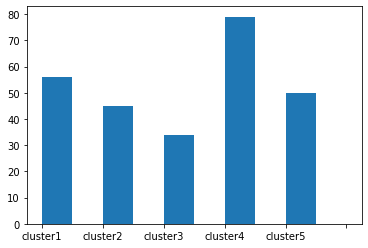

In [13]:
s = X_positive['cluster']
fig, ax = plt.subplots()
ax.hist(s, range=(0,5))
ax.set_xticklabels(['a','cluster1','cluster2','cluster3','cluster4','cluster5'])
plt.show()

In [14]:
for i in range(n_comp):
    temp = X_positive['id'][X_positive['cluster']==i]
#     print(i,':',temp.keys())
    indexs = pd.DataFrame(temp.keys()) 
    ids = pd.DataFrame(temp.values)

    ids.to_csv("id_cluster{}.csv".format(i+1), index=False)
    indexs.to_csv("index_cluster{}.csv".format(i+1), index=False)

In [15]:
#to save data of each cluster in .csv file
label=[]
for i in range(len(l)):
    label.append(l[i])
label.append('id')
    
for i in range(n_comp):
    pd.DataFrame(np.concatenate((
      X_positive[X_positive['cluster']==i].drop(['cluster'], axis=1).to_numpy(),
      x_negative.to_numpy()), axis=0),columns=label).to_csv("cluster{}_X.csv".format(i+1),index=False)
    
    pd.DataFrame(np.concatenate((
        y_positive['label'][y_positive['cluster']==i].to_numpy(),
        y_negative['label'].to_numpy() )),columns=['label'] ).to_csv("cluster{}_Y.csv".format(i+1),index=False)

In [16]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBRFClassifier

In [17]:
def create_clf():
    clf=[]
    clf.append(RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_split=2, bootstrap=False,random_state=100) )
    clf.append(GradientBoostingClassifier(learning_rate=0.001,subsample=0.7,n_estimators=500,max_depth=9,random_state=290) )
    clf.append(XGBRFClassifier(learning_rate=1,subsample=0.1, random_state=290) )
    clf.append(GaussianNB() )
    clf.append(KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree') )
    clf.append(SVC(kernel='poly',degree=4,probability=True,random_state=24) )
    clf.append(MLPClassifier(hidden_layer_sizes=700,alpha=0.002,activation='relu',solver='sgd',learning_rate='adaptive',early_stopping=True, random_state=213))
    
    return clf    

In [29]:
def data_clf(x,y,num):
    
    n_dataset = num
    clf = create_clf()
    x_train,x_test, y_train,y_test= train_test_split(x, y, random_state=0, test_size= 0.15, shuffle=True)
    
    #choose between ascertain classifiers
#     for i in range(len(clf)):
    clf = clf[0]

    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    labels = [1,0]
    clf_report = classification_report(y_test,
                                   y_predict,
                                   labels=labels,
                                   output_dict=True)
    print('true labels are:',y_test)
    print('predicted labels:',y_predict)
    np.unique(y,return_counts=True)
    
    out = str(type(clf).__name__) + ' for dataset:'+ str(n_dataset) 
    
    return clf_report,out
                        

In [30]:
def make_balanced():
    x_balanced = []
    y_balanced = []

    print(X_positive.shape)
    for i in range(n_comp):
        x_balanced.append(np.concatenate((
          X_positive[X_positive['cluster']==i].drop(['cluster'], axis=1).to_numpy(),
          x_negative.to_numpy()), axis=0))

        y_balanced.append(np.concatenate((
            y_positive['label'][y_positive['cluster']==i].to_numpy(),
            y_negative['label'].to_numpy() )) )
    return x_balanced,y_balanced
   

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# to vote for each classifier with 5 data inputs
acc=[]
x_balanced, y_balanced = make_balanced()
def voting_clf_class(x ,y):

    clfs = create_clf()
    vo_clf = clfs[0] #best classifier 'RandomForest' is chosen
    
    for i in range(len(x)):
        x_tr,x_ts, y_tr,y_ts= train_test_split(x[i], y[i], random_state=0, test_size= 0.15, shuffle=True)
                          
        probas = vo_clf.fit(x_tr, y_tr).predict_proba(x_ts) 
        p = np.array(probas)
        alive_col= list()
        
        for pr in probas:
            alive_col.append(pr[1])
    
#     print(np.array(col1) > 0.5)
        class1_vote= [np.mean(np.array(alive_col) > 0.5)]
        class0_vote= [1 -class1_vote[0]]
        
        class0_true= ((np.unique(y_ts,return_counts=True))[1][0]/len(y_ts))
        class1_true= ((np.unique(y_ts,return_counts=True))[1][1]/len(y_ts))
        
        acc0= 1- abs(class0_true-class0_vote)
        acc1= 1- abs(class1_true- class1_vote)
    
        print('VOTES for class-0:',"{:.2f}".format(class0_vote[0])," TRUE labels for class-0","{:.2f}".format(class0_true),
              '\tacc:','{:.2f}'.format(acc0[0]))
        print('VOTES for class-1:',"{:.2f}".format(class1_vote[0])," TRUE labels for class-1","{:.2f}".format(class1_true),
              '\tacc:','{:.2f}'.format(acc1[0]))
        print('\t\t   -----------------------------')
        acc.append(acc0)

    print('final accuracy is ', '{:.2f}'.format(((np.array(acc).sum(axis=0))/5)[0]))
voting_clf_class(x_balanced,y_balanced)    
        

(264, 12)
VOTES for class-0: 0.65  TRUE labels for class-0 0.59 	acc: 0.94
VOTES for class-1: 0.35  TRUE labels for class-1 0.41 	acc: 0.94
		   -----------------------------
VOTES for class-0: 0.50  TRUE labels for class-0 0.62 	acc: 0.88
VOTES for class-1: 0.50  TRUE labels for class-1 0.38 	acc: 0.88
		   -----------------------------
VOTES for class-0: 0.71  TRUE labels for class-0 0.57 	acc: 0.86
VOTES for class-1: 0.29  TRUE labels for class-1 0.43 	acc: 0.86
		   -----------------------------
VOTES for class-0: 0.43  TRUE labels for class-0 0.29 	acc: 0.86
VOTES for class-1: 0.57  TRUE labels for class-1 0.71 	acc: 0.86
		   -----------------------------
VOTES for class-0: 0.47  TRUE labels for class-0 0.53 	acc: 0.94
VOTES for class-1: 0.53  TRUE labels for class-1 0.47 	acc: 0.94
		   -----------------------------
final accuracy is  0.89


(264, 12)
true labels are: [1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0]
predicted labels: [1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0]
true labels are: [1 1 0 0 0 1 0 0 0 0 1 1 1 0]
predicted labels: [1 1 0 0 0 1 0 0 0 0 1 1 1 0]
true labels are: [1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1]
predicted labels: [1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1]
true labels are: [1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1]
predicted labels: [1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1]
true labels are: [0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1]
predicted labels: [0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1]


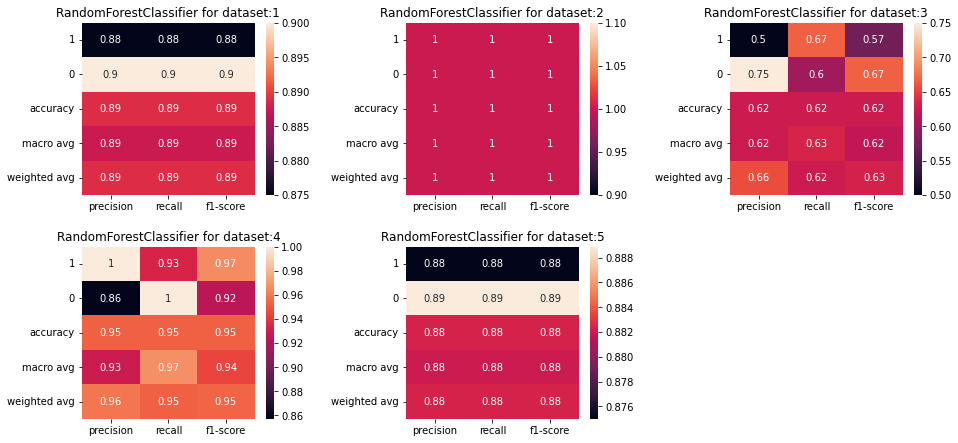

IndexError: invalid index to scalar variable.

In [23]:
x_balanced, y_balanced = make_balanced()
fig = plt.figure(figsize=(2, 1))
fig.subplots_adjust(left=0, right=6, bottom=0, top=5.5, hspace=0.3, wspace=0.5)
clf_rep=[]

# to train and test data with 6 different classifiers
for i in range(5): #5
    ax = fig.add_subplot(2,3, i+1)
    clf_rep.append(data_clf(x_balanced[i],y_balanced[i], i+1))
    sns.heatmap(pd.DataFrame(clf_rep[i][0]).iloc[:-1, :].T, ax=ax, annot=True).set_title(clf_rep[i][1])
plt.show()


In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

#voting for different classifiers but same data

def voting_clf_class(x,y):
    clfs = create_clf()
    
    
    voting_clf = VotingClassifier( estimators=[('rf',clf[0]), ('gb', clf[1]), ('xgbr', clf[2]),
                                              ('gnb', clf[3]), ('kn', clf[4]), ('svc', clf[5]), ('MLP',clf[6])], voting='soft')
    
    
    clfs.append(voting_clf)                              
    probas = [c.fit(x, y).predict_proba(x) for c in clfs]
    
    class1_1 = [pr[0, 0] for pr in probas]
    class2_1 = [pr[0, 1] for pr in probas]
    
    # plotting
    N = 8  # number of groups
    ind = np.arange(8)  # group positions
    width = 0.35  # bar width

    fig, ax = plt.subplots()
    fig.set_size_inches(12.5, 5.5)
    p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
    p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
                color='lightgreen', edgecolor='k')

    # bars for VotingClassifier
    p3 = ax.bar(ind, [0, 0, 0 ,0 ,0 ,0 , 0, class1_1[-1]], width,
                color='blue', edgecolor='k')
    p4 = ax.bar(ind + width, [0, 0, 0 ,0 ,0 , 0, 0, class2_1[-1]], width,
                color='lightblue', edgecolor='k')

    # plot annotations
    ax.set_xticks(ind + width)
    ax.set_xticklabels(['RandomForestClassifier',
                        'GradientBoostingClassifier',
                        'XGBRFClassifier',
                        'GaussianNB',
                        'KNeighborsClassifier',
                        'SVC',
                        'MLP',
                       'VotingClassifier\n(average probabilities)'],
                       rotation=40,
                       ha='right')
    plt.axvline(5.7, color='k', linestyle='dashed')
    plt.ylim([0, 1])
    plt.title('Class probabilities for one sample by different classifiers')
    plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='best')
    plt.tight_layout()
    plt.show()
    

    x_train,x_test, y_train,y_test= train_test_split(x, y, random_state=0, test_size= 0.15, shuffle=True) 
    for clf_ in clfs:
        clf_.fit(x_train, y_train)
        y_pred = clf_.predict(x_test)
        print('the acuracy of ',clf_.__class__.__name__ , accuracy_score(y_test, y_pred))
        

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

#voting for same classifier but different data

def voting_clf_class(x, y):

    clfs = create_clf()
    #choose between ascertain classifiers
#     for i in range(len(clfs)):
    vo_clf = clfs[6]
       
                                 
    probas = [vo_clf.fit(x[c], y[c]).predict_proba(x[c]) for c in range(len(x))]
    p = np.array(probas)
    alive_col= list()

    for pr in probas:
        for i in pr:
            alive_col.append(i[1])
    
#     print(np.array(col1) > 0.5)
    class1_1 = [np.mean(np.array(alive_col) > 0.5)]
    class0_1= [1 -class1_1[0]]
    
    print('number of votes for class-0:',"{:.4f}".format(class0_1[0]))
    print('number of votes for class-1:',"{:.4f}".format(class1_1[0]))
    
    # plotting
    N = 1  # number of groups
    ind = np.arange(1)  # group positions
    width = 0.7  # bar width

    fig, ax = plt.subplots()
    fig.set_size_inches(5.5, 5.5)
    p1 = ax.bar(ind, np.hstack(([class0_1[:], [0]])), width,
            color='green', edgecolor='k')
    p2 = ax.bar(ind + width, np.hstack(([class1_1[:], [0]])), width,
                color='lightgreen', edgecolor='k')


    # plot annotations
    ax.set_xticks(ind + (width/2))
    ax.set_xticklabels(['voting classifier'])
    plt.axvline(2.7,color='white')
    plt.title('Class probabilities for 5 clusters of data by '+str(type(vo_clf).__name__)+' classifier')
    plt.legend([p1[0], p2[0]], ['class 0', 'class 1'], loc='right')
    plt.tight_layout()
    plt.show()
    
    
        